# EBLT Basic Example

In [1]:
import matplotlib.pyplot as plt
from pmd_beamphysics import ParticleGroup
import numpy as np
from pmd_beamphysics.units import mec2

In [2]:
from eblt.run import EBLT
import os


# Setup

Instantiate the object on a value init file. This will configure a working directory that stages all input and output files.

In [22]:
test = EBLT(input = "example1/eblt.in", workdir = os.environ.get('SCRATCH'), 
            command = '/sdf/group/ad/sw/beta/bin/xeblt')

Here is what the parsed input looks like

In [4]:
test.input.parameters

Parameters(np=1024, nz=128, zmin=-0.002981592, zmax=0.002211398, flagfwd=1, flagdist=200, Iavg=0.13, Ek=92706472.0, mass=511005.0, charge=-1.0, freq=1300000000.0)

In [5]:
test.input.lattice_lines

[ChangeEnergy(energy_increment=5462800.0, name='aee_E'),
 DriftTube(length=74.9744159418, beam_radius=0.0003, name='D1'),
 Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=1.0, name='Wake1'),
 RFCavity(length=16.603888, beam_radius=0.0003, gradient=10907447.83, frequency=1300000000.0, phase_deg=-17.43982832, name='L1'),
 Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=41.0, switch=-1.0, name='Wake2'),
 DriftTube(length=8.5305163742, beam_radius=0.0003, name='D2'),
 Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=42.0, switch=1.0, name='Wake3'),
 RFCavity(length=5.5346304, beam_radius=0.0003, gradient=9053035.459, frequency=3900000000.0, phase_deg=-148.9681881, name='Xbane'),
 Wakefield(length=0.0, multiplier=1.0, wake_function_file_id=42.0, switch=-1.0, name='Wake4'),
 DriftTube(length=12.518616788, beam_radius=0.0003, name='D3'),
 DriftTube(length=7.256313209, beam_radius=0.0003, name='D4'),
 Chicane(length=0.203558243263, beam_radius=0.

The input format that eblt will see

In [6]:
test.write_input()
!cat {test.path}/eblt.in

! np nz zmin zmax flagfwd flagdist
1024 128 -0.002981592 0.002211398 1 200 /
! a0 a1 a2 a3 a4 a5 a6 a7 a8 a9
0 0 0 /
! b0 b1 b2 b3 b4 b5 b6 b7 b8 b9
1 0 0 /
! Iavg Ek mass charge freq
0.13 92706472 511005 -1 1300000000 /
! length Bnseg Bmpstp ChangeEnergy energy_increment name
0 1 1 -39 5462800 / !name: aee_E
! length Bnseg Bmpstp Drift name
74.9744159418 1 1 0 0.0003 / !name: D1
! length Bnseg Bmpstp Wakefield multiplier wake_function_file_id switch name
0 1 1 -41 1 41 1 / !name: Wake1
! length Bnseg Bmpstp RFCavity beam_radius gradient frequency phase_deg name
16.603888 1 1 103 0.0003 10907447.83 1300000000 -17.43982832 / !name: L1
! length Bnseg Bmpstp Wakefield multiplier wake_function_file_id switch name
0 1 1 -41 1 41 -1 / !name: Wake2
! length Bnseg Bmpstp Drift name
8.5305163742 1 1 0 0.0003 / !name: D2
! length Bnseg Bmpstp Wakefield multiplier wake_function_file_id switch name
0 1 1 -41 1 42 1 / !name: Wake3
! length Bnseg Bmpstp RFCavity beam_radius gradient frequency phase_

# Run

In [7]:
output = test.run()

In [9]:
test.output.run

RunInfo(error=False, error_reason='', run_script='/sdf/group/ad/sw/beta/bin/xeblt', run_time=0.38015446602366865)

# Output

<!-- lume-genesis detected Jupyter and will use HTML for rendering. -->

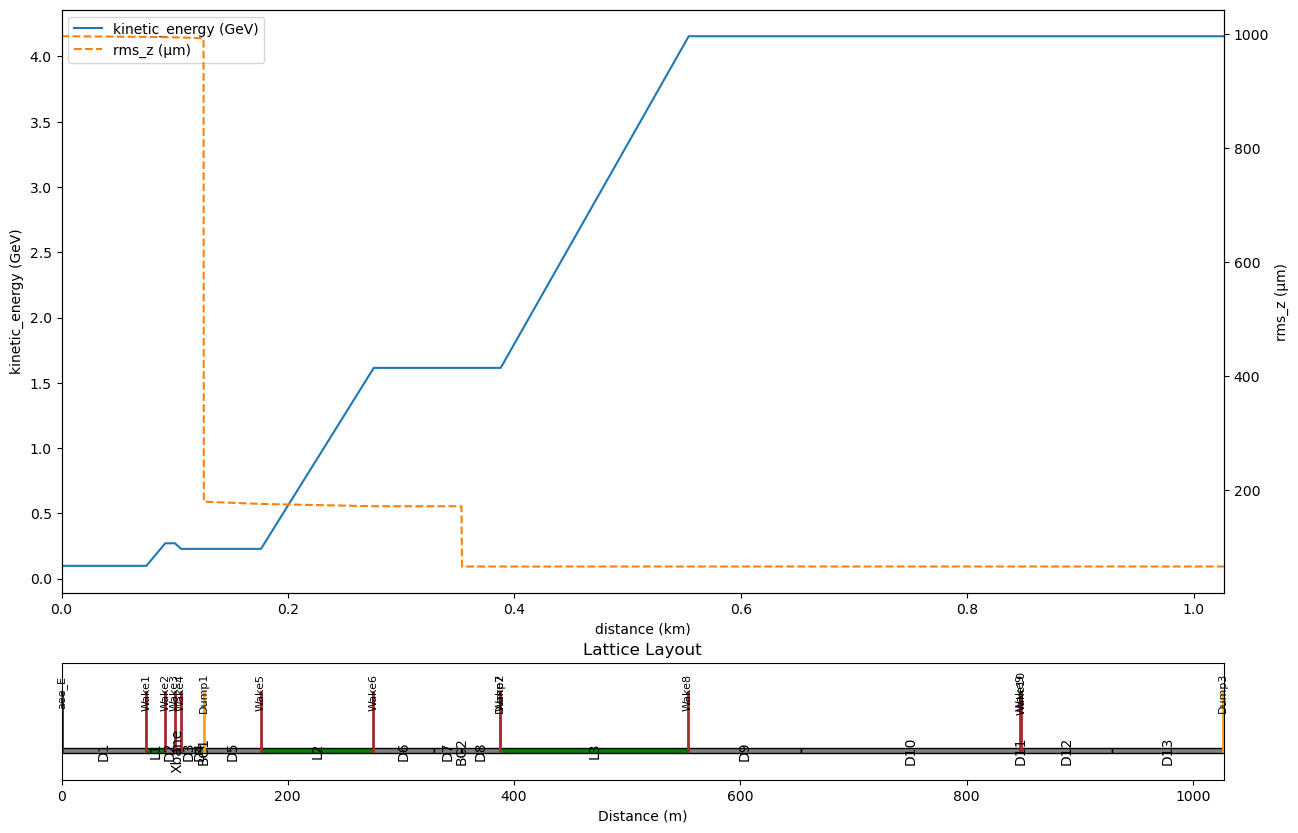

In [10]:
test.plot()

In [11]:
particles = test.output.particle_distributions
print(particles.keys())

dict_keys([221, 201, 213, 101, 211])


initial particle distribution

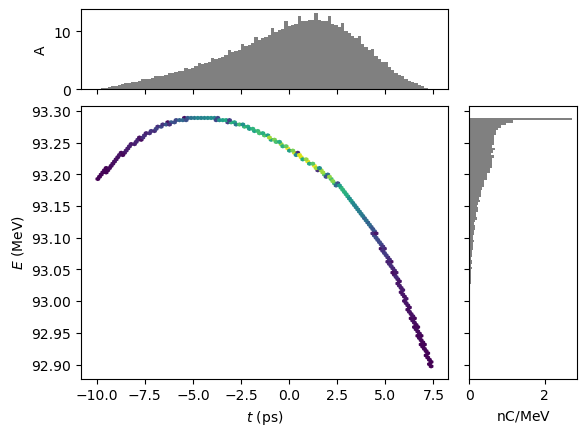

In [12]:
test.output.plot_distribution(file_id = 101, xkey = 't', ykey = 'energy', bins = 100)

LPS after BC1

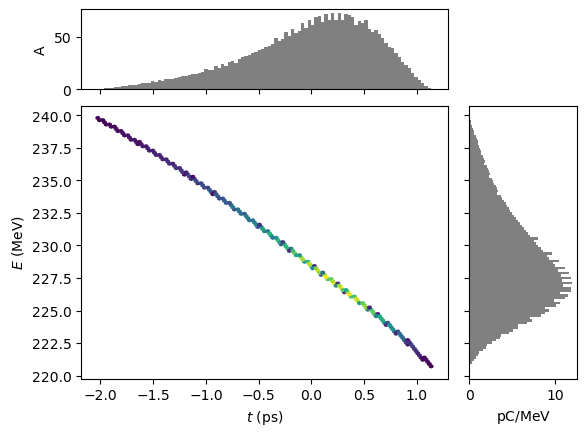

In [13]:
test.output.plot_distribution(file_id = 211, xkey = 't', ykey = 'energy', bins = 100)

Final LPS

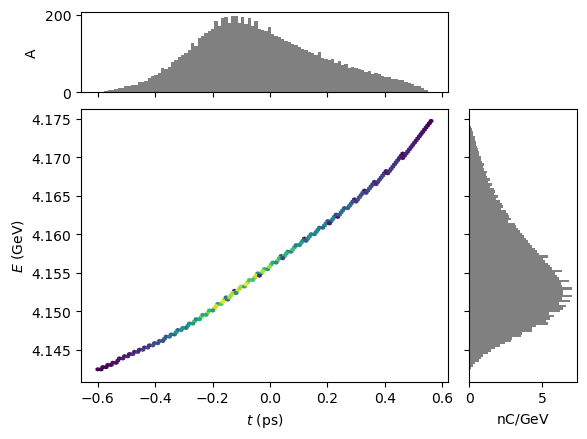

In [15]:
test.output.plot_distribution(file_id = 201, xkey = 't', ykey = 'energy', bins = 100)

# Archiving

In [20]:
test.archive('./archivefile.h5')

In [21]:
test.load_archive('./archivefile.h5')